# Distribución en forma de anillo

- El clustering es un algorítmo no supervisado que junta puntos similares.
- La distancia entre observaciones es un criterio para hacer las agrupaciones y se representa en forma de matriz de distancias nxn.
- El clustering jerárquico aglomerativo empieza con n clusters individuales y los va juntando en base a enlaces con la matriz de distancias.
- K means es un algorítmo muy utilizado para crear k clusters conocido el valor de k o k centros iniciales.
- Decidir el número de clusters es importante y podemos usar la silueta o el codo.


In [1]:
from math import sin, cos, radians, pi, sqrt
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("classic")

In [2]:
angle = np.linspace(0,2*np.pi, 3000) 

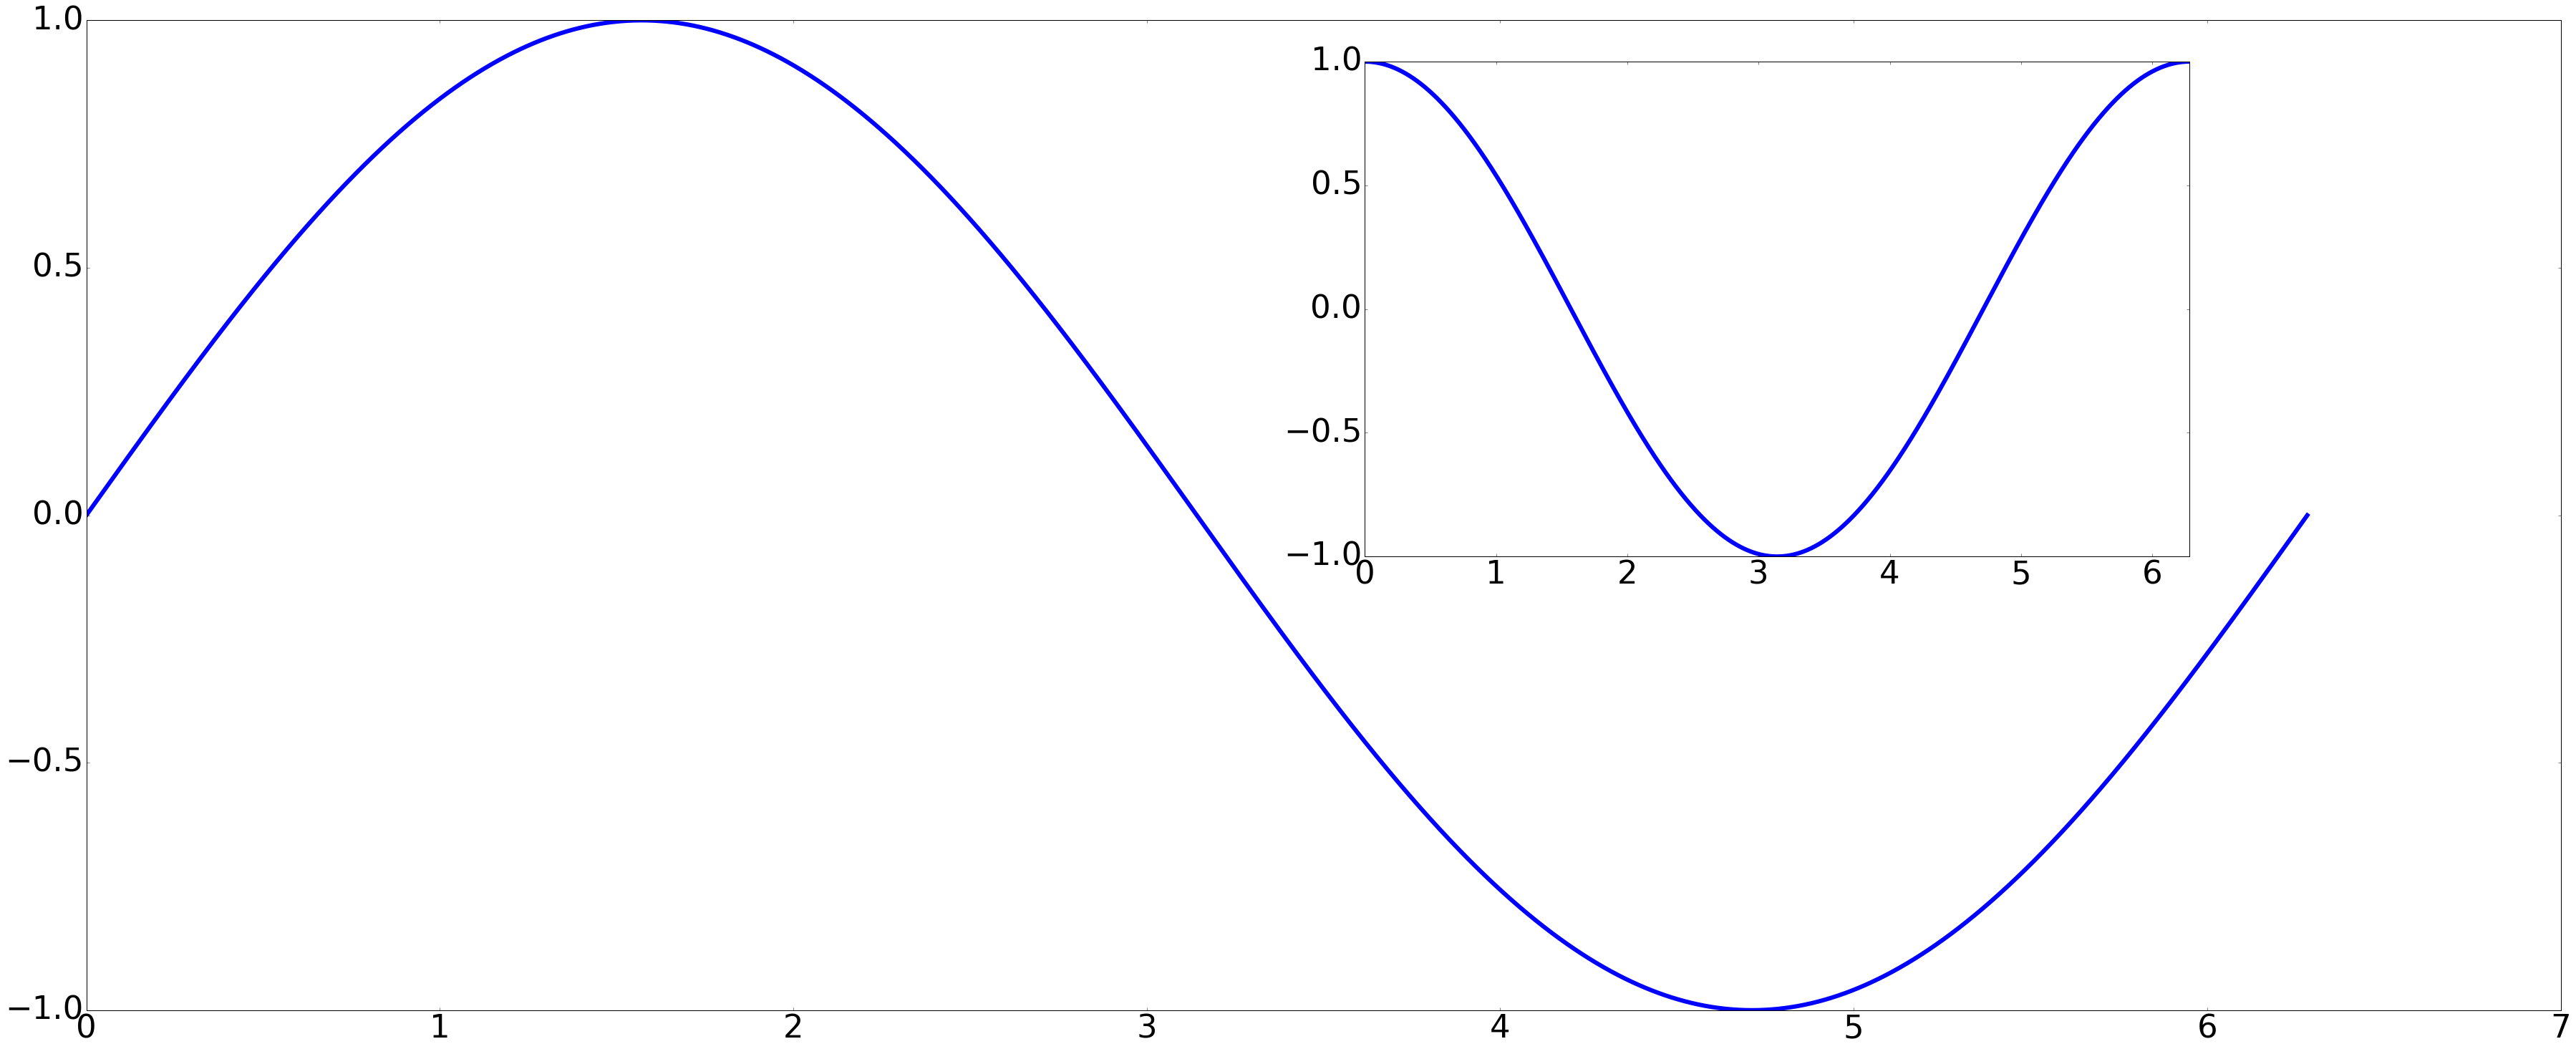

In [3]:
fig = plt.figure(figsize=(16,16))
axes1 = fig.add_axes([1,1.5,3,1.2])
axes1.plot(angle, np.sin(angle),lw=6)
plt.xticks(fontsize = 45)
plt.yticks(fontsize = 45)
axes2 = fig.add_axes([2.55,2.05,1,.6])
axes2.plot(angle,np.cos(angle),lw = 6)
axes2.set_xlim(0,max(angle),)
plt.xticks(fontsize = 45)
plt.yticks(fontsize = 45)
plt.show()

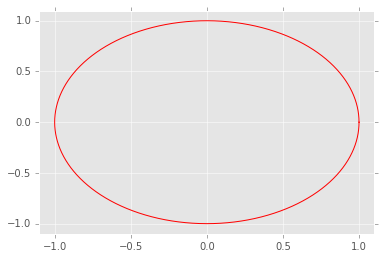

In [4]:
plt.style.use("ggplot")
plt.plot(np.cos(angle),np.sin(angle),"r")
plt.axis([-1.1,1.1,-1.1,1.1])
plt.show()

In [5]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = np.random.uniform(0,2*np.pi, n_samples) 
    distance = np.random.uniform(r_min,r_max,n_samples)
    data = []
    for a,d in zip(angle,distance):
        data.append([d*cos(a),d*sin(a)])
    return np.array(data)

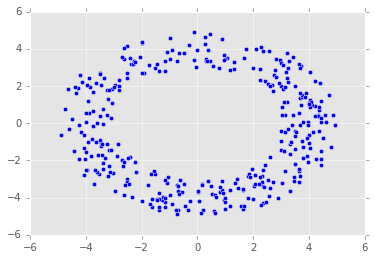

In [6]:
data1 = ring(3,5)
plt.scatter(data1[:,0],data1[:,1]);plt.show()

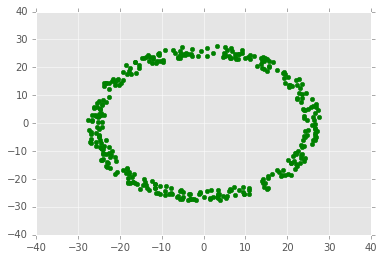

In [7]:
data2 = ring(24,28)
plt.scatter(data2[:,0],data2[:,1], color= "g" )
plt.show()

In [8]:
data = np.concatenate([data1,data2],axis = 0)
labels = np.concatenate([np.repeat(0,int(len(data)/2)),np.tile(1,int(len(data)/2))])

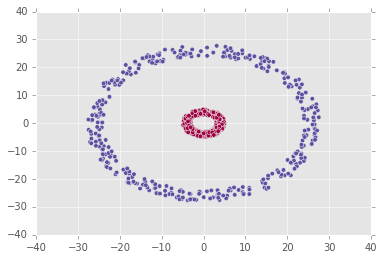

In [9]:
plt.scatter(data[:,0],data[:,1], c = labels, s = 20, cmap = "Spectral")

## Algorítmo de KMeans

In [10]:
from sklearn.cluster import KMeans

In [11]:
km = KMeans(n_clusters=2).fit(data)

In [12]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
km.cluster_centers_

array([[-13.71760484, -15.07014782],
       [  3.3259696 ,   3.41129682]])

In [14]:
prediction = km.predict(data)

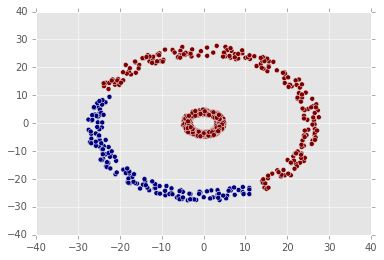

In [15]:
plt.scatter(data[:,0],data[:,1],c = prediction, s = 25)
plt.show()

### **<center> Predicción Errónea**

# Algorítmo con KMedoides

In [16]:
from pyclust import KMedoids

In [17]:
?KMedoids

In [18]:
kmed = KMedoids(n_clusters=2).fit_predict(data) # Ajusta y predice

In [19]:
kmed

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

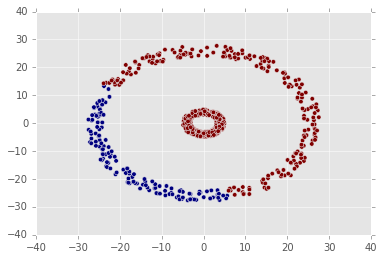

In [20]:
plt.scatter(data[:,0],data[:,1],c = kmed, s=20)
plt.show()

### **<center> Tampoco funciona**

## Algorímto de Clustering Espectral

In [21]:
from sklearn.cluster import SpectralClustering

In [22]:
?SpectralClusteringctralClusteringctralClusteringctralClustering

Object `SpectralClusteringctralClusteringctralClusteringctralClustering` not found.


In [23]:
clust = SpectralClustering(n_clusters=2).fit_predict(data)
# Se realiza una transformación Lineal

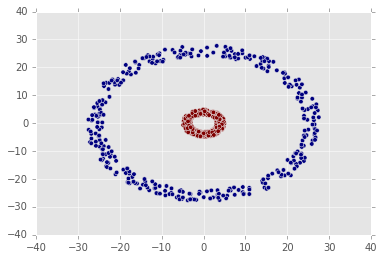

In [24]:
plt.scatter(data[:,0],data[:,1],c = clust, s=20)
plt.show()

In [25]:
np.sum(clust==labels)/len(labels) # Ajuste

0.0